In [1]:
from src.data.dataloaders import GMC_DataLoader, NIH_DataLoader


In [2]:
gmc_dataloader = GMC_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "train")

nih_dataloader = NIH_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "train")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


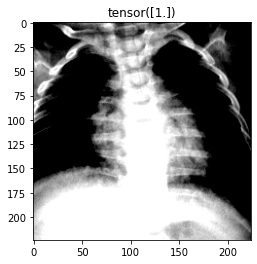

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


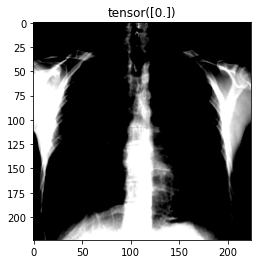

In [3]:
gmc_dataloader.show(iter = 1)
nih_dataloader.show(iter = 1)